## <font color='blue'>** Analysis of used cars, posted for sale in the U.S.**</font>
   in this project, I work on a dataset that contains information of car sale posts in Craiglist for the months of June and July, 2021. Each entry contains information about time and location of the post, all details of the car/truck/... posted including size, model, maker, odometer, year, and desired price and description/text provided by the poster. The dataset contains nearly half of a million samples. I looked at this dataset from a few angles. First, I did some data visualizations. Then, I set some basic measures to see if the seller/poster is from a dealership or not. Finally, Decision Tree, Random Forest and artificial neural network models were developed to predict the price tag of a post based on the details of the cars in the posts.
   
  
### <font color='green'>**Dependencies:**</font>
1. Numpy 
2. Pandas 
3. Sikit-learn
4. Keras(Tensorflow - backend)
5. Tensorflow 2.0
6. Matplotlib
7. Seaborn

### <font color='green'>**Datasets:**</font>
* The main dataset was downloaded from kaggle at [here](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) : the size of this CSV format dataset is  1.45 GB.



<code>  



</code>


#### <font>**Loading and Exploring the Dataset**</font>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\m\Desktop\job\projects\kaggle\archivecraiglist\vehicles.csv')
print('shape of the dataframe is:',np.shape(df))
print('column names:\n', df.columns)
print("\n NAN values per column:---------\n", df.isna().sum())
print("\n data_types:---------\n", df.dtypes)

shape of the dataframe is: (426880, 26)
column names:
 Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

 NAN values per column:---------
 id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              

In [3]:
df = df.drop(columns = ['id', 'county', 'url', 'region_url', 'image_url'])
# here some of the comuns that are bot helpful are removed. the id is unique, the county is nan for all entries, 
# and all urls return server error.

1      77984
2      17896
3       7631
4       4747
5       2799
       ...  
214        1
149        1
207        1
79         1
89         1
Name: VIN, Length: 136, dtype: int64


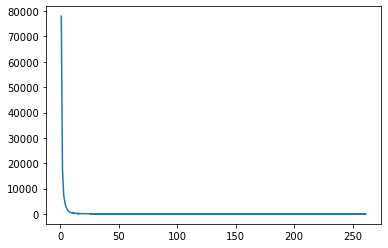

In [4]:
multi_posting = df["VIN"].value_counts().value_counts()# here based on the VIN , we can 
# see the number of cars that have been reposted for different reason, as seen majority are
# posted once asd one fifth of that have been posted more. 
plt.plot(multi_posting)
print(multi_posting)


In [5]:
#Here we want to see during the week, what day sees the maximum number of posts.
# Given that the time window of the datasets posts in just 30 days, there should be  uch of price change 
# over time.
def split(string):# this function decomposes the time string.
    import re
   
    return list(map(int, re.split("-|T|:", string)[:-1]))

def list_to_time(l):# retirved the day of the week
    from datetime import datetime
    string = "-".join(list(map(str, l)))
    return datetime.strptime(string, '%Y-%m-%d-%H-%M-%S').weekday()

df = df.drop(df.index[df['posting_date'].isna()], axis=0)



time = df['posting_date'].map(split) # the other numbers related to the time are also retrieved.
year = time.map(lambda s:s[0])
month = time.map(lambda s:s[1])
day_of_month = time.map(lambda s:s[2])
time_of_day = time.map(lambda s:s[3] + s[4] / 60)
time_history = time.map(lambda s:((s[1] - 4) * 30 + s[2]))
day_of_week = time.map(list_to_time)
df['posting_date']=time_history
print("the listing is for years {} to {} and for months {} to {} and total days of {}".format(
    min(year), max(year), min(month), max(month), max(time_history) - min(time_history)))

the listing is for years 2021 to 2021 and for months 4 to 5 and total days of 30


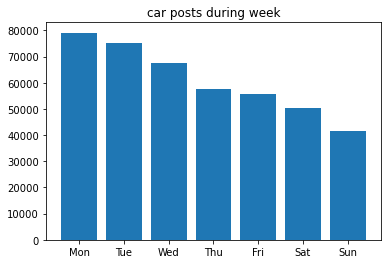

In [6]:
# as the listing is for 30 days, posting times of two days are removed to have equal days of the week. 
counted_days = (time_history == 29) & (time_history == 30)
even_days_of_week = day_of_week.drop(day_of_week.index[counted_days], axis=0)
days = ["Mon", "Tue", 'Wed', "Thu", 'Fri', 'Sat', 'Sun']
plt.bar(days, even_days_of_week.value_counts())
plt.title("car posts during week")
plt.show()

In [7]:
cat_col = list(df.select_dtypes(include=['object']).columns)
non_cat_col = list(df.select_dtypes(exclude=['object']).columns)


In [8]:
# just to see the overal structure of each columns and get some sense about how the data is presented in each column.
for c in cat_col:
    if c != 'description':
        print(df[c].unique(), '\n-------------------------------')
        print(df[c].value_counts(), '\n------------------------------')
for c in non_cat_col:
    print("{} minimum is {} and maximum {}".format(c, min(df[c]), max(df[c])))
    

['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'northwest CT' 'washington, DC' 'de

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'year of car')

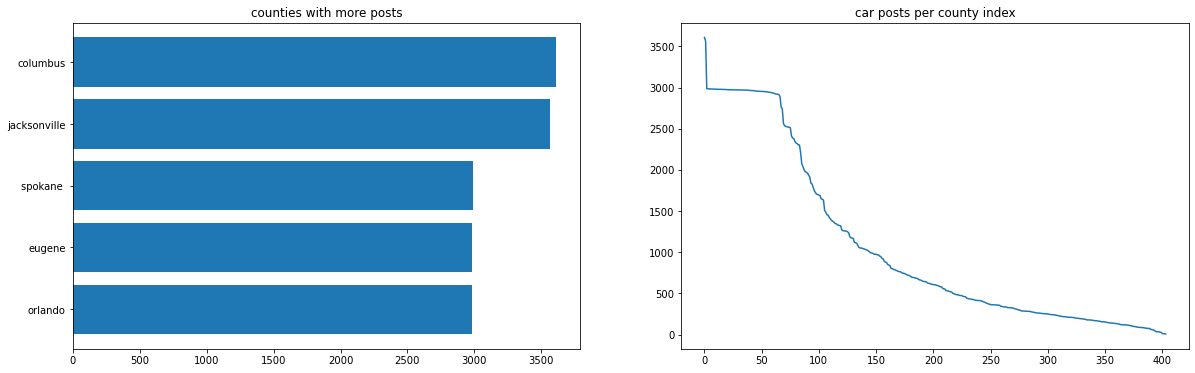

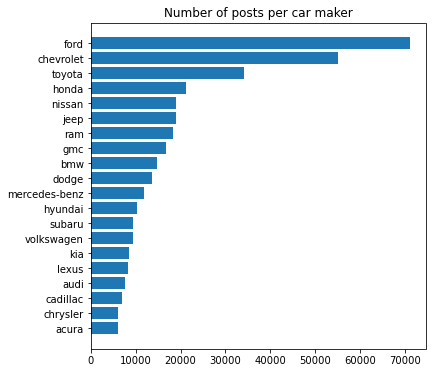

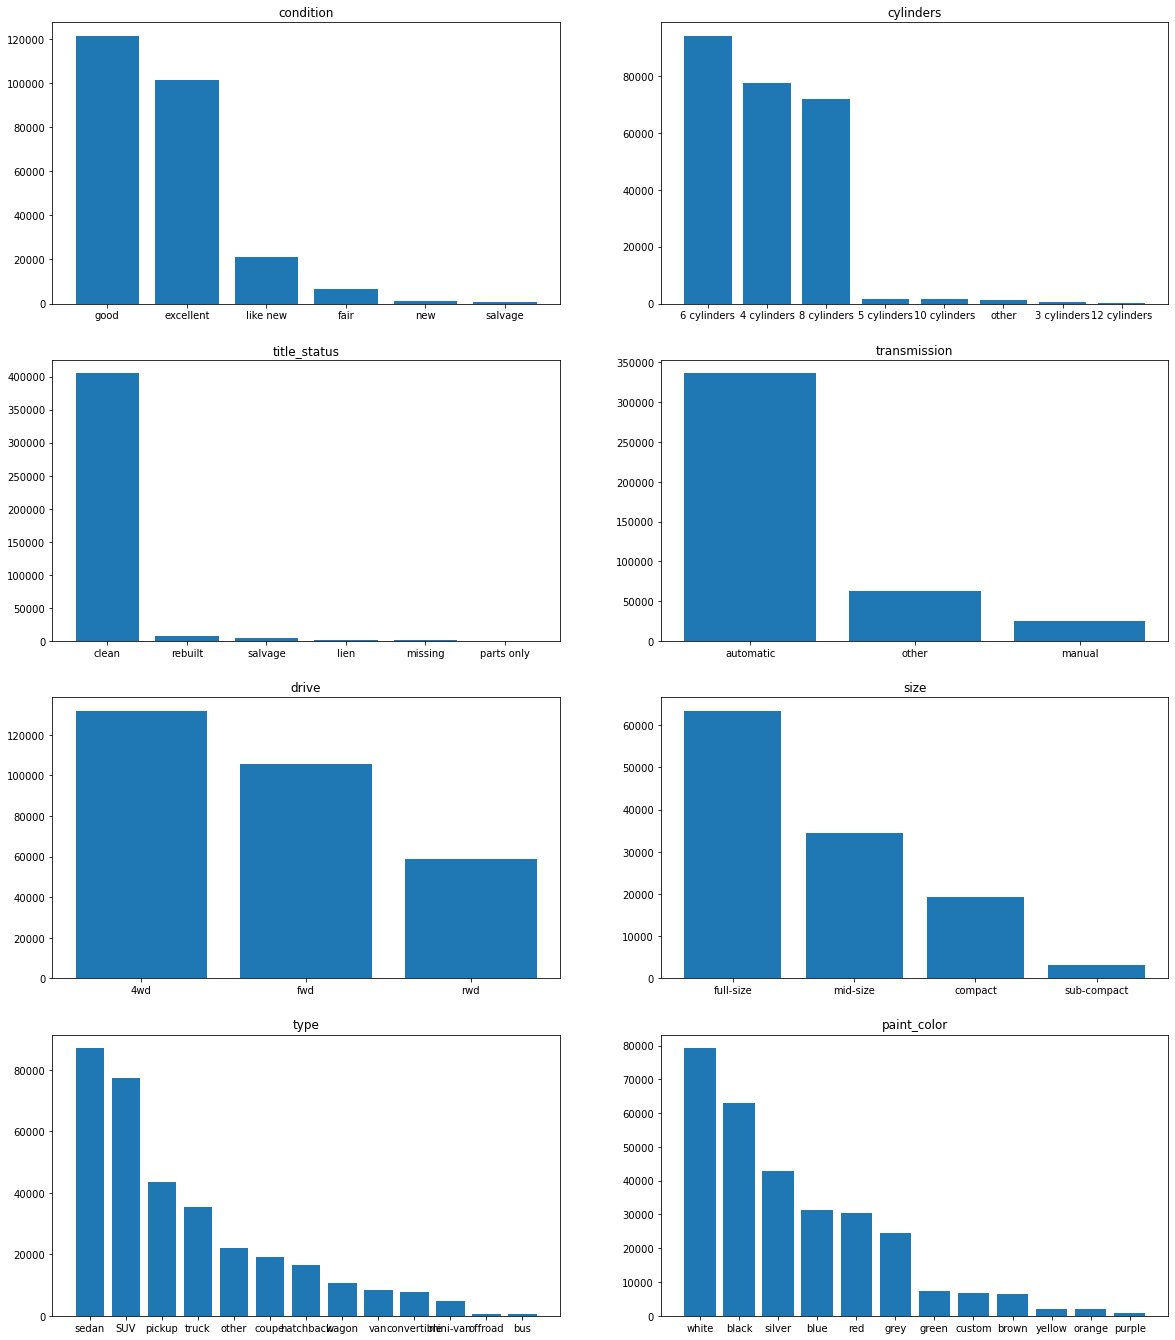

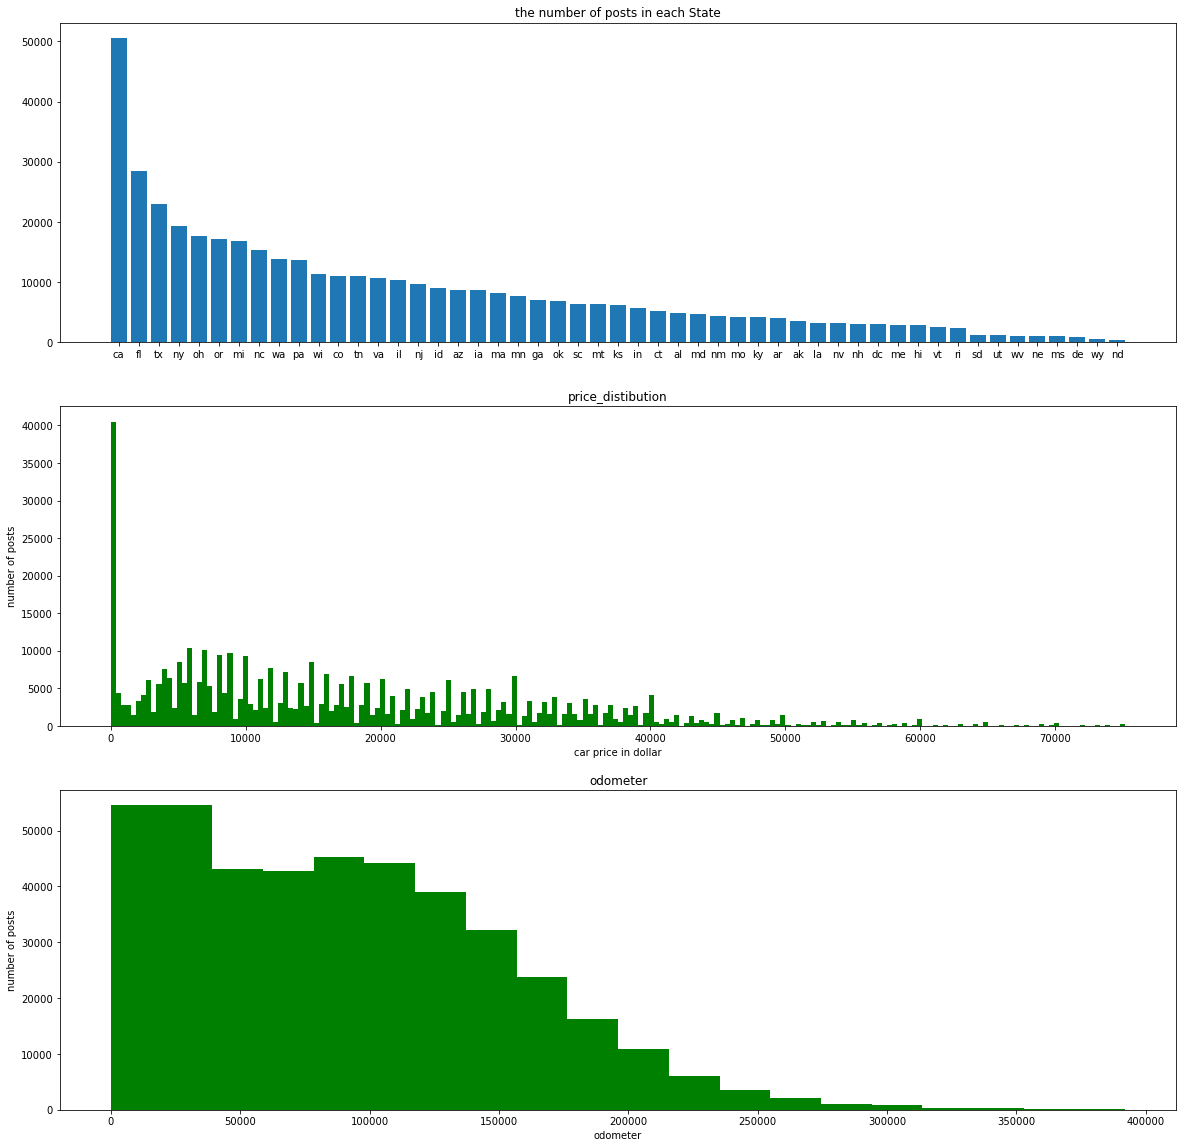

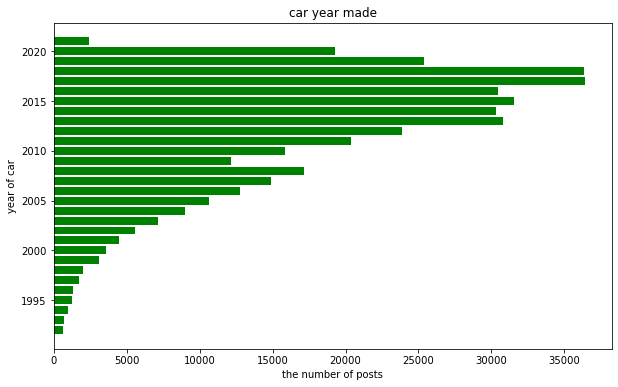

In [9]:
# first, i cleaned the region column. some values that are using slash are decomposed and the forst element is used.
# the i ploted some of the columns.
def region_name(string): #
    import re
    return re.split("/", string)[0]

df['region'] = df['region'].map(region_name)
temp = df['region'].value_counts()
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.barh(temp[:5][::-1].index, temp[:5][::-1])
plt.title('counties with more posts')
plt.subplot(122)
plt.plot(list(temp))
plt.title('car posts per county index')

temp = df['manufacturer'].value_counts()[:20][::-1] # which car makers have hogher posts? plot top 20 ones.
plt.figure(figsize=(6, 6))
plt.barh(temp.index, temp)
plt.title('Number of posts per car maker')


plt.figure(figsize=(20, 30)) # shows how posts are distributed in terms of differen factors shuch as condition of 
# the car, cylinders, title_status, etc.
plot_list = ['condition', 'cylinders', 'title_status',
           'transmission', 'drive', 'size', 'type', 'paint_color']
for i, v in enumerate(plot_list):
    plt.subplot(5, 2, i + 1)
    temp = df[v].value_counts()
    plt.bar(temp.index, temp)
    plt.title(v)


plt.figure(figsize=(20, 20))
plt.subplot(311)
temp = df['state'].value_counts()
plt.bar(temp.index, temp)
plt.title('the number of posts in each State') # distribution of the posts per states

plt.subplot(312)# generally plots the distribution of the prices of the cars/trucks/... posted
ref = np.mean(df['price'])
majority = df['price'].drop(df.index[df['price'] > ref], axis=0, inplace=False)
plt.hist(majority, 200, density=False, facecolor='g')#, alpha=0.75)
plt.title('price_distibution')
plt.xlabel('car price in dollar')
plt.ylabel('number of posts')

plt.subplot(313)# to plot the car posts based on the odometer reads
ref = np.mean(df['odometer']) * 4
majority = df['odometer'].drop(df.index[df['odometer'] > ref], axis=0, inplace=False)
plt.hist(majority, 20, density=False, facecolor='g')#, alpha=0.75)
plt.title('odometer')
plt.xlabel('odometer')
plt.ylabel('number of posts')

temp = df['year'].value_counts()# year model of the cars.
plt.figure(figsize = (10,6))
plt.barh(temp.iloc[:30][::-1].index, temp.iloc[:30][::-1], facecolor='g')
plt.title('car year made')
plt.xlabel('the number of posts')
plt.ylabel('year of car')

the number of keys are 8726


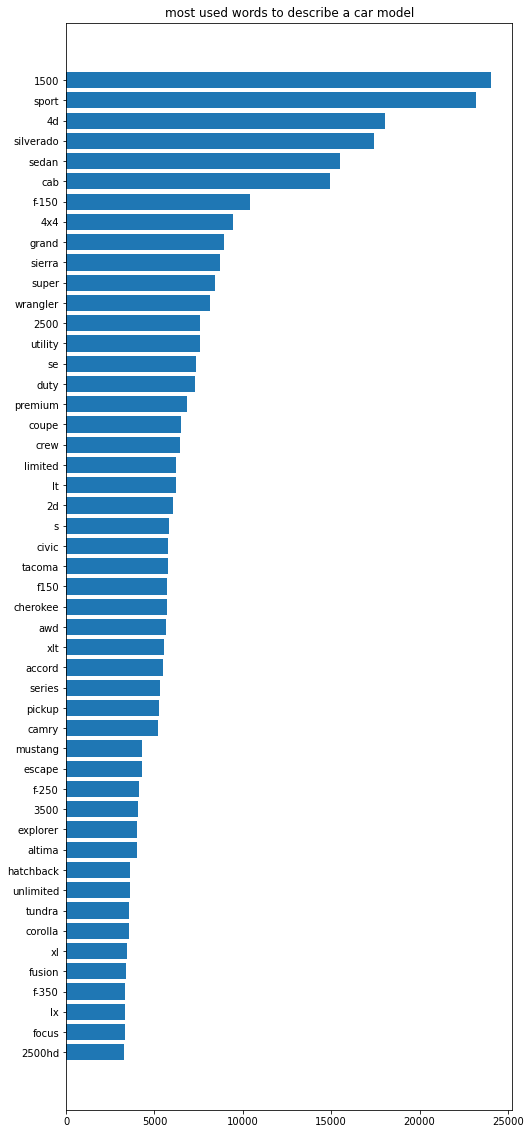

In [10]:
# the model of the cars should be an important factor in our analysis especialy in deciding the price of the car
# however, the way the post reads the model makes the models less udeful. for example, model ford f-150 for has been written 
# indifferent shapes for example as f-150, f150,150, f-150-pickup many other formsand the model can not undrstand that these
# actuallu represent the same car. So , to reduce this prblem, I split the string and make five columns out of this
# model columns.
def model_words_list(string): # splits the model string
    import re
    model = ['na', 'na', 'na', 'na', 'na']
    if string != np.nan:
        model = re.split(" ", string) + model
    return list(map(lambda s: s.lower(), model[:5]))

df['model'].fillna('NA', inplace = True)

words = df['model'].map(model_words_list)
keys = []
for w in words:
    keys += w
keys
    
from collections import Counter# just wanted to see what keyswords are used more frequently.
print('the number of keys are {}'.format(len(set(keys))))
top_keys = Counter(keys).most_common(50)
top_keys.pop(0)
top_keys = list(zip(*top_keys))
 
plt.figure(figsize = (8, 20))
plt.barh(top_keys[0][::-1], top_keys[1][::-1])
plt.title('most used words to describe a car model')




unique_keys=list(set(keys))
unique_keys_codes = {}
for i,v in enumerate(unique_keys):
    unique_keys_codes[v] = i
def model_to_codes(m):
    return list(map(lambda s:unique_keys_codes[s], m))
codes = words.map(model_to_codes)
model_df = pd.DataFrame()
for i in range(4):
    df['model_' + str(i)] = codes.map(lambda s:s[i])
df.drop(columns=['model'], axis = 1, inplace = True)

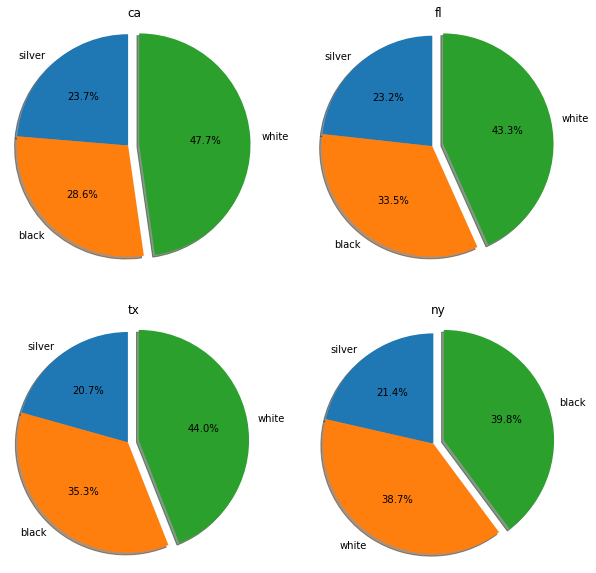

In [11]:
top_states = ['ca', 'fl', 'tx', 'ny'] # here to show what paint colors are used more in 4 states with more car postings.
top_colors = {}
plt.figure(figsize = (10, 10))
for i, state in enumerate(top_states):
    df_state = df.iloc[df.index[df['state'] == state], :]
    temp = df_state['paint_color'].value_counts()[:3]
    total = temp.sum()
    temp = temp.map(lambda s:s / total).sort_values()
    labels = list(temp.index)
    sizes = list(temp)
    explode = (0 , 0, 0.1)  # 
    plt.subplot(2, 2, i + 1)
    plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
    plt.axis('equal')  # Equal aspect ratio
    plt.title(state)




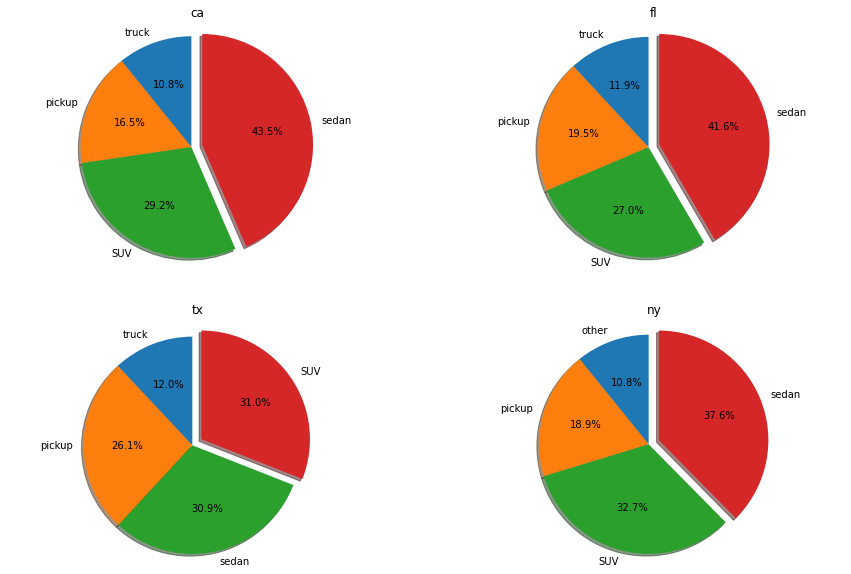

In [12]:
top_states = ['ca', 'fl', 'tx', 'ny'] # plots the car tyes are used more
top_colors = {}
plt.figure(figsize = (15, 10))
for i, state in enumerate(top_states):
    df_state = df.iloc[df.index[df['state'] == state], :]
    temp = df_state['type'].value_counts()[:4]
    total = temp.sum()
    temp = temp.map(lambda s:s / total).sort_values()
    labels = list(temp.index)
    sizes = list(temp)
    explode = (0 , 0,0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    plt.subplot(2, 2, i + 1)
    plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(state)


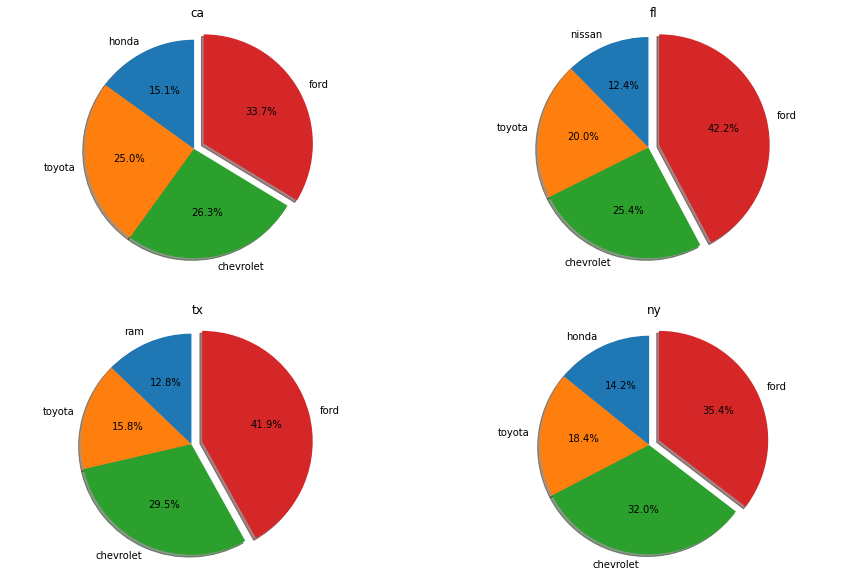

In [13]:
top_states = ['ca', 'fl', 'tx', 'ny'] # used plot the makers that are posted more than oters in these states
top_colors = {}
plt.figure(figsize = (15, 10))
for i, state in enumerate(top_states):
    df_state = df.iloc[df.index[df['state'] == state], :]
    temp = df_state['manufacturer'].value_counts()[:4]
    total = temp.sum()
    temp = temp.map(lambda s:s / total).sort_values()
    labels = list(temp.index)
    sizes = list(temp)
    explode = (0 , 0,0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    plt.subplot(2, 2, i + 1)
    plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(state)

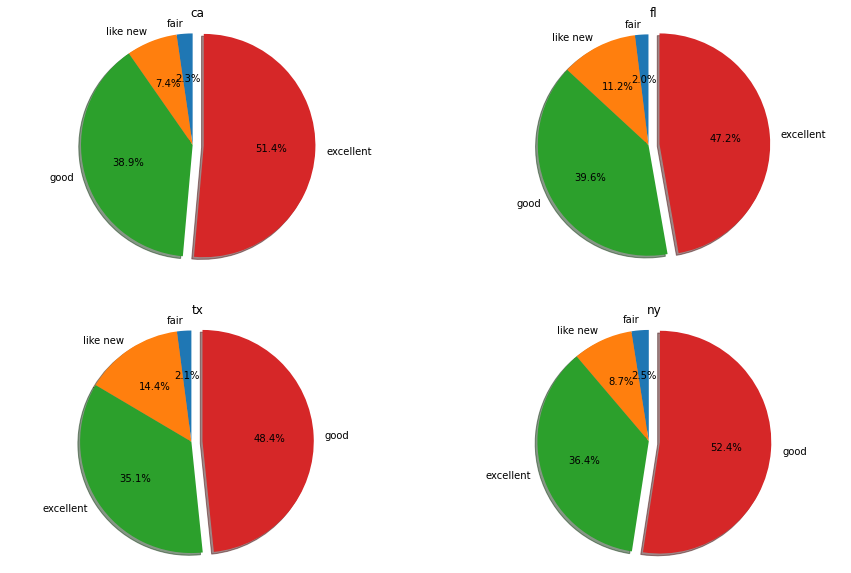

In [14]:
top_states = ['ca', 'fl', 'tx', 'ny'] # what cars with what condtiion are posted mre in these states.
top_colors = {}
plt.figure(figsize = (15, 10))
for i, state in enumerate(top_states):
    df_state = df.iloc[df.index[df['state'] == state], :]
    temp = df_state['condition'].value_counts()[:4]
    total = temp.sum()
    temp = temp.map(lambda s:s / total).sort_values()
    labels = list(temp.index)
    sizes = list(temp)
    explode = (0 , 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    plt.subplot(2, 2, i + 1)
    plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(state)

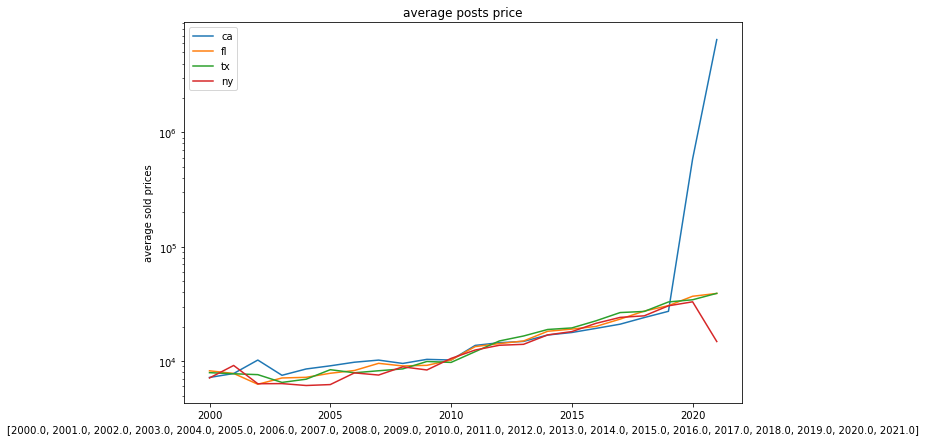

In [15]:
top_states = ['ca', 'fl', 'tx', 'ny'] # I jst wanted to see the average price of the cars per state per years. soem new 
# cars have been manipulated by the model. That's why the price has an unexpected rise in 2020
years = [float(2000 + i) for i in range(22)]
top_price = {}
plt.figure(figsize = (10, 7))
for i, state in enumerate(top_states):
    df_state = df.iloc[df.index[df['state'] == state], :]
    df_state_year = df_state[['price', 'year']].groupby(['year']).mean()
    df_state_year = df_state_year.loc[years, :]
    plt.plot(df_state_year, label = state)
plt.title('average posts price')
plt.xlabel(years)
plt.ylabel('average sold prices')
plt.yscale('log')
plt.legend()

Text(0.5, 1.0, 'makers average price for cars between 5k and 80 k')

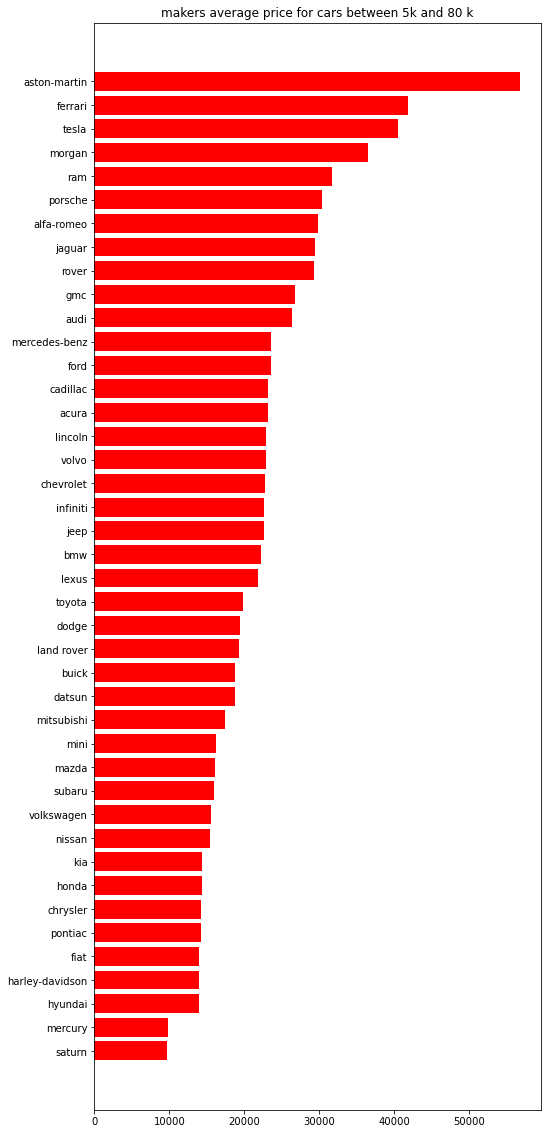

In [16]:
# plots the makers that have on average highe car prices.
ind = df.index[(df['price'] < 80000) & (df['price'] > 5000)]
real_cars_df = df.loc[ind, :]
maker_average_price = real_cars_df[['price', 'manufacturer']].groupby(['manufacturer']).mean()
maker_average_price.sort_values(by = ['price'], inplace = True)
plt.figure(figsize = (8, 20))
plt.barh(maker_average_price.index, list(maker_average_price['price']), facecolor = 'r')
plt.title('makers average price for cars between 5k and 80 k')

Text(0.5, 1.0, 'average anuual depriciation of the used cars in 2017-2020 years as the percentage of average corresponding car price in 2020')

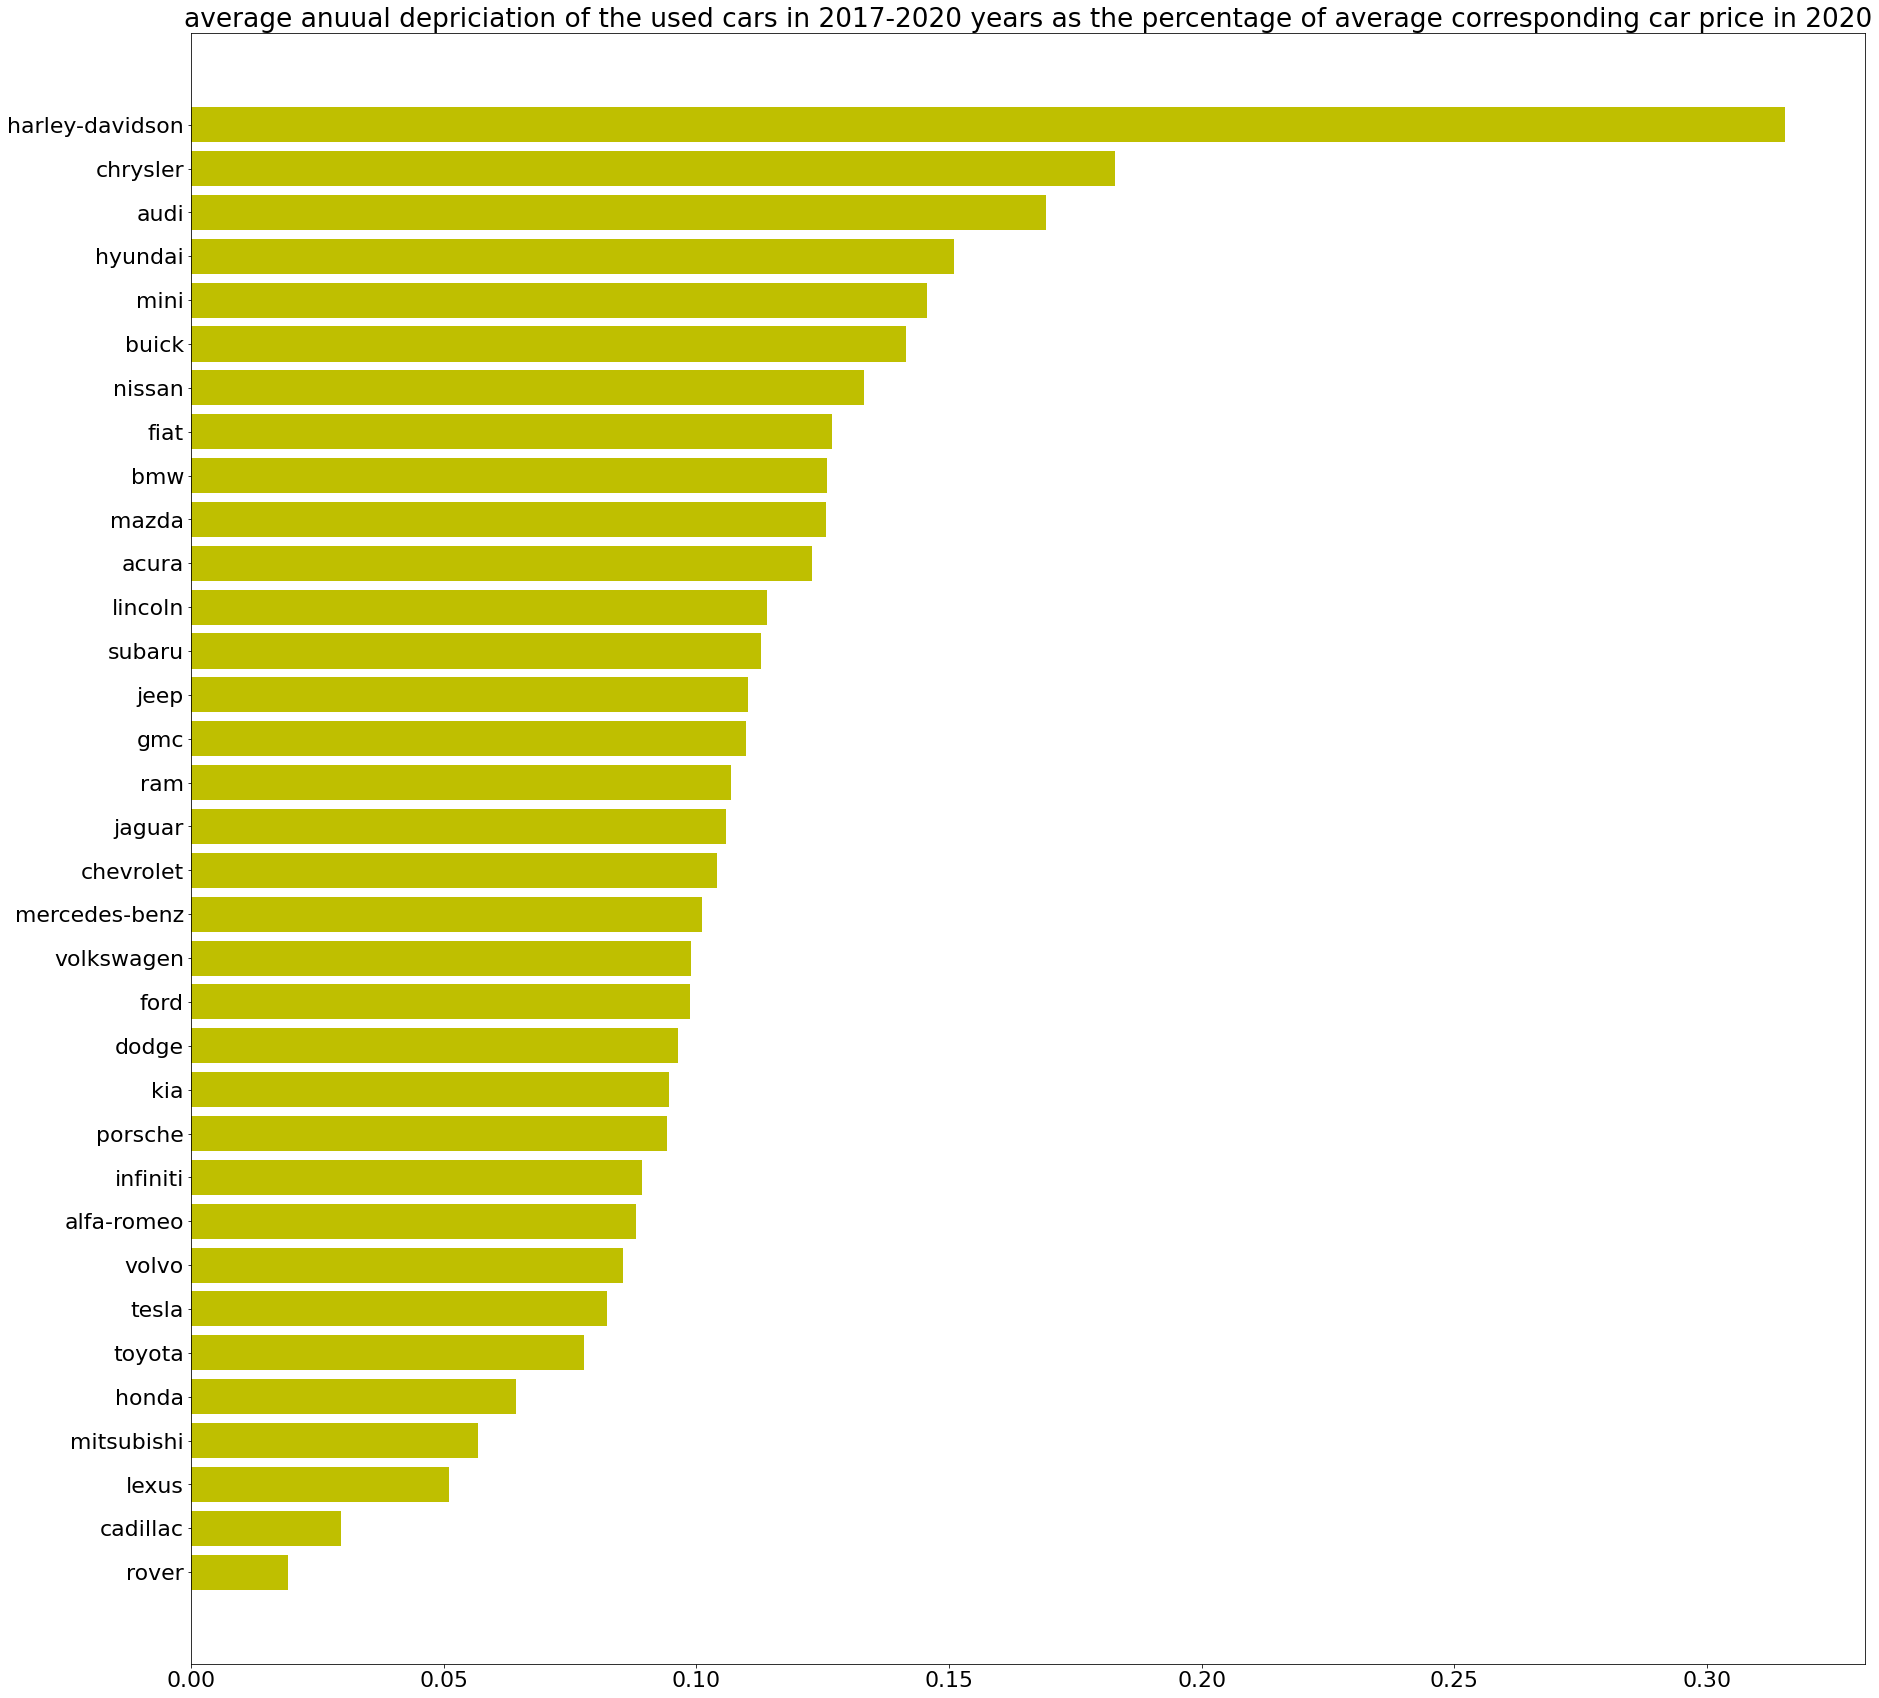

In [17]:
# Here, I wanted to plot the average depriciation of the cars posts. this is just for plotting purposes and is biased.
# for example some makers may have bigger share of more expensive cars, newere cars, or car types (truck vs compact),
# and so their share should be normally different even if other factors are all identical.
# the plots is for cars that priced less than 80k and more than 5 k and years between 2017 and 2020.
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
ind=df.index[(df['price'] < 80000) & (df['price'] > 5000) & (2017 < df['year']) & (df['year'] <= 2020)]
real_cars_df = df.loc[ind, :]
maker_average_price = real_cars_df[['price', 'manufacturer', 'year']].groupby(['manufacturer', 'year']).mean()
ind = maker_average_price.index
makers = set(list(zip(*ind))[0])
depriciation = {}
for maker in makers:
    depriciation[maker] = set()
for i in maker_average_price.index:
    depriciation[i[0]].add(int(maker_average_price.loc[i]))
for maker in makers:
    temp = depriciation[maker]
    if len(temp)>1:
        average_dep = (max(temp) - min(temp)) / (len(temp) - 1) / max(temp)
    else:
        average_dep = 0
    depriciation[maker] = average_dep
    
depriciation = pd.Series(list(depriciation.values()), index = depriciation.keys())
depriciation.sort_values(inplace = True)
plt.figure(figsize = (30, 30))
plt.barh(depriciation.index, list(depriciation), facecolor = 'y')
plt.title("average anuual depriciation of the used cars in 2017-2020 years as the percentage of average corresponding car price in 2020")


Text(0.5, 1.0, 'average anuual depriciation of the used cars in 2012-2020 as the percentage of average corresponding car price in 2021')

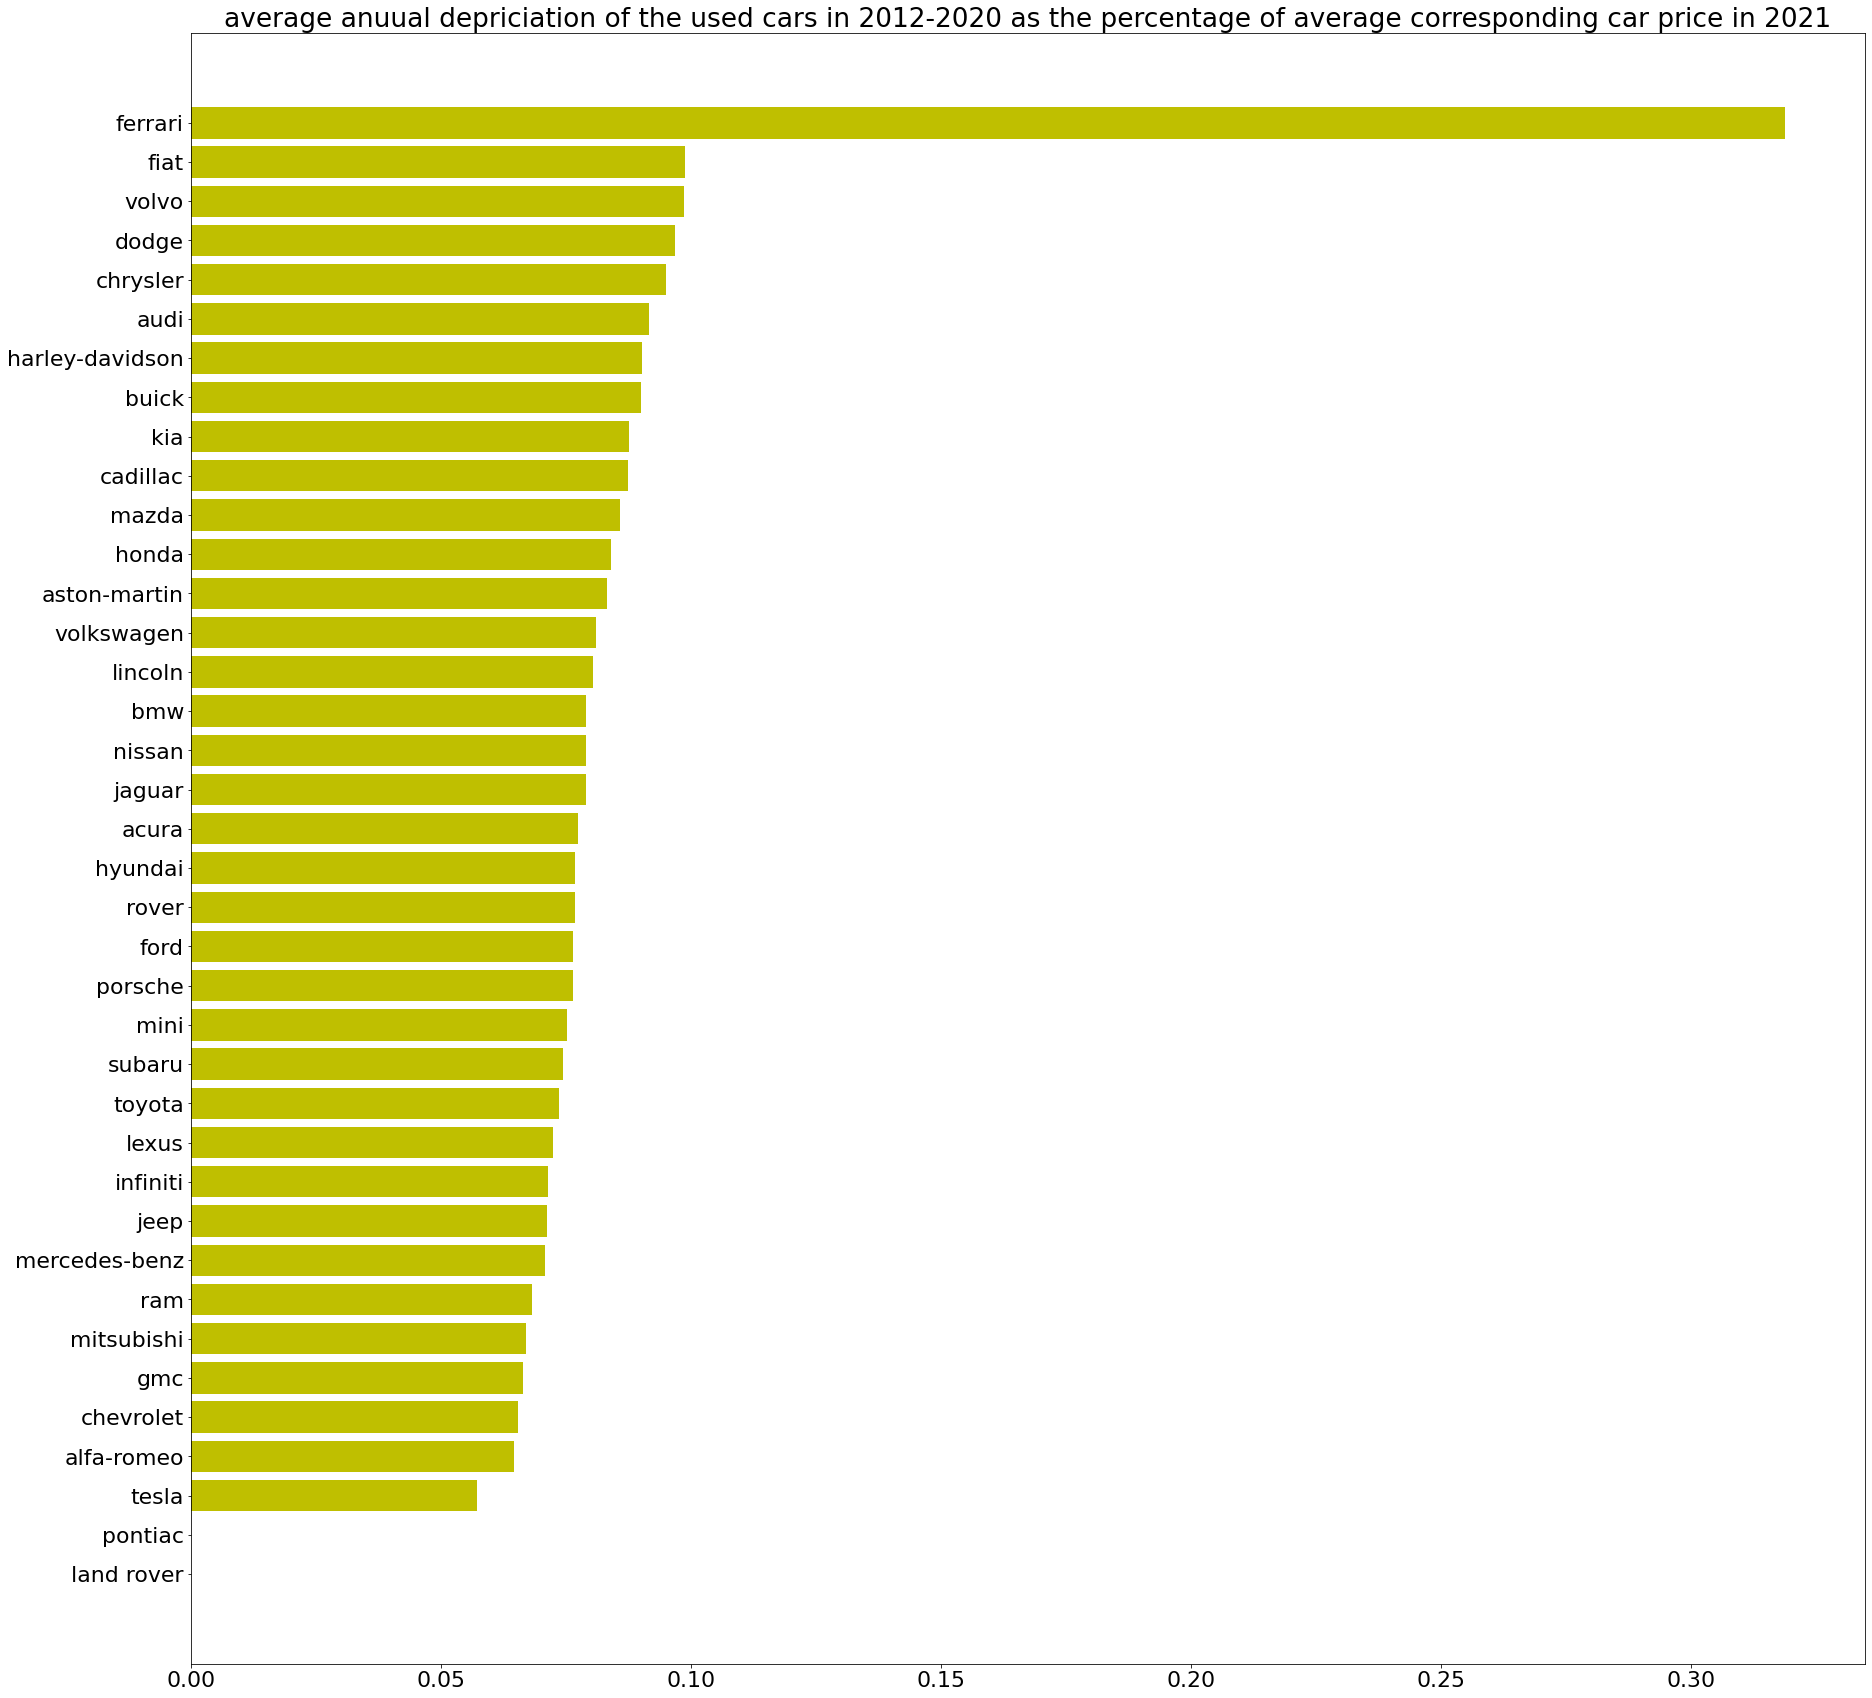

In [18]:
# the same plot as in the previous one but for years 2012 to 2020.
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
ind = df.index[(df['price'] < 80000) & (df['price'] > 2000) & (2012 < df['year']) & (df['year'] <= 2021)]
real_cars_df = df.loc[ind, :]
maker_average_price = real_cars_df[['price', 'manufacturer', 'year']].groupby(['manufacturer', 'year']).mean()
ind = maker_average_price.index
makers = set(list(zip(*ind))[0])
depriciation = {}
for maker in makers:
    depriciation[maker] = set()
for i in maker_average_price.index:
    depriciation[i[0]].add(int(maker_average_price.loc[i]))
for maker in makers:
    temp = depriciation[maker]
    if len(temp) > 1:
        average_dep = (max(temp) - min(temp)) / (len(temp) - 1) / max(temp)
    else:
        average_dep = 0
    depriciation[maker] = average_dep
    
depriciation = pd.Series(list(depriciation.values()), index = depriciation.keys())
depriciation.sort_values(inplace = True)
plt.figure(figsize = (30, 30))
plt.barh(depriciation.index, list(depriciation), facecolor = 'y')
plt.title("average anuual depriciation of the used cars in 2012-2020 as the percentage of average corresponding car price in 2021")

<code>
          
<code/>
   
# Converting the text of the posts.

In [19]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
description      object
state            object
lat             float64
long            float64
posting_date      int64
model_0           int64
model_1           int64
model_2           int64
model_3           int64
dtype: object

In [20]:
# weather a posts belongs to a dealer ship or from a private party should affect some of the features inclduing the 
# suggested price. even the texts of it may affect some of these elements. Here fore simplicity instead of machne 
# learning, we applied some regular expression search to see to identify  dealership vs non-dealership posts
# for example, the posts that contain a telephone number or website, or talk strictly about the their businessmdel
# or have a very lengthy description should be signes of a dealership. while the posts that done have any of these flage
# may be closer to non-dealership posts choice. so the feature we use iut of the posts text, is length of the text
# and a number representing the toality of htese factors.
def dealer_indications(des):
   
    import re
    has_website = int('www' in des or 'WWW' in des or 'http' in des or '@' in des )
    tell_pattern = '\(*[1-9][0-9][0-9]\)*\-*[0-9][0-9][0-9]\-*[0-9][0-9][0-9][0-9]'
    punc_pattern = '[^(a-z|A-Z|0-9)]'
    term_pattern = 'credit|dealer|dealership|call us|text us|financing|financial|warranty|trade'
    contacts = len(re.findall(tell_pattern, des))
    lengthy = len(des)>1000
    #non_characters=max(len(re.findall(punc_pattern,des)),10)-10
    cred = len(re.findall(term_pattern, des))
    total = has_website + contacts + cred + lengthy#non_characters+cred
    return total

In [21]:
description=df['description']# the post description/text is removed and the new features are added.
df=df.drop(columns=['description'],axis=1)
description.fillna('0', inplace = True)
#df['dealer_index'] = description.map(dealer_indications)
df['description_length'] = description.map(len)
#lets show some of the posts that have a small number of dealer-index or and some with high number of dealer_index
#print("possibly from non-dealership posts samples---------------------------------------------------",
#     description[sample(df.index[(df['dealer_index']==0)],10)])
#print("possibly from dealership posts samples---------------------------------------------------",
#      description[sample(df.index[(df['dealer_index']>4)],2)])

#### <font>**Predicting the price tag of a post given all other information in the post**</font>

In [22]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive',
       'size', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date',
       'model_0', 'model_1', 'model_2', 'model_3', 'description_length'],
      dtype='object')

In [23]:
cat_col = list(df.select_dtypes(include=['object']))
df[cat_col] = df[cat_col].astype('category') # the categorial columns datatype is object in this dataset. the
# columns need to be defined category to be converted to codes.
my_codes = {}
my_dict = {}
for c in cat_col:
    my_map = dict(enumerate(df[c].cat.categories))
    my_codes[c] = my_map
    my_dict[c] = dict(zip(my_map.values(), my_map.keys()))
    df[c] = df[c].cat.codes

In [24]:
# I filled  nan values. as was seen before the number of rwos with these columns as nan values were very low.

df['odometer'].fillna(1000000, inplace = True)
df['year'].fillna(1900, inplace = True)
df['lat'].fillna(0, inplace = True)
df['long'].fillna(0, inplace = True)

ind = df.index[(df['price'] < 80000) & (df['price'] > 2000)&(
    2005 < df['year']) & (df['year'] <= 2021) & (df['odometer'] < 400000)]
real_cars_df = df.loc[ind, :]
# 3 percent of the posts are reserved as the test which will be around 12000 posts which i think suffices for testing
test_set = real_cars_df.sample(frac = 0.03)
real_cars_df.drop(index = test_set.index, axis = 0, inplace = True)
y_train = real_cars_df['price']
real_cars_df.drop(columns = ['price'], axis = 1, inplace = True)
x_train = real_cars_df

y_test = test_set['price']
test_set.drop(columns = ['price'], axis = 1, inplace = True)
x_test =test_set

The R2 measure using decision tree is 0.8799874131275423
The MSE measure using decision tree is 4793.987417880998


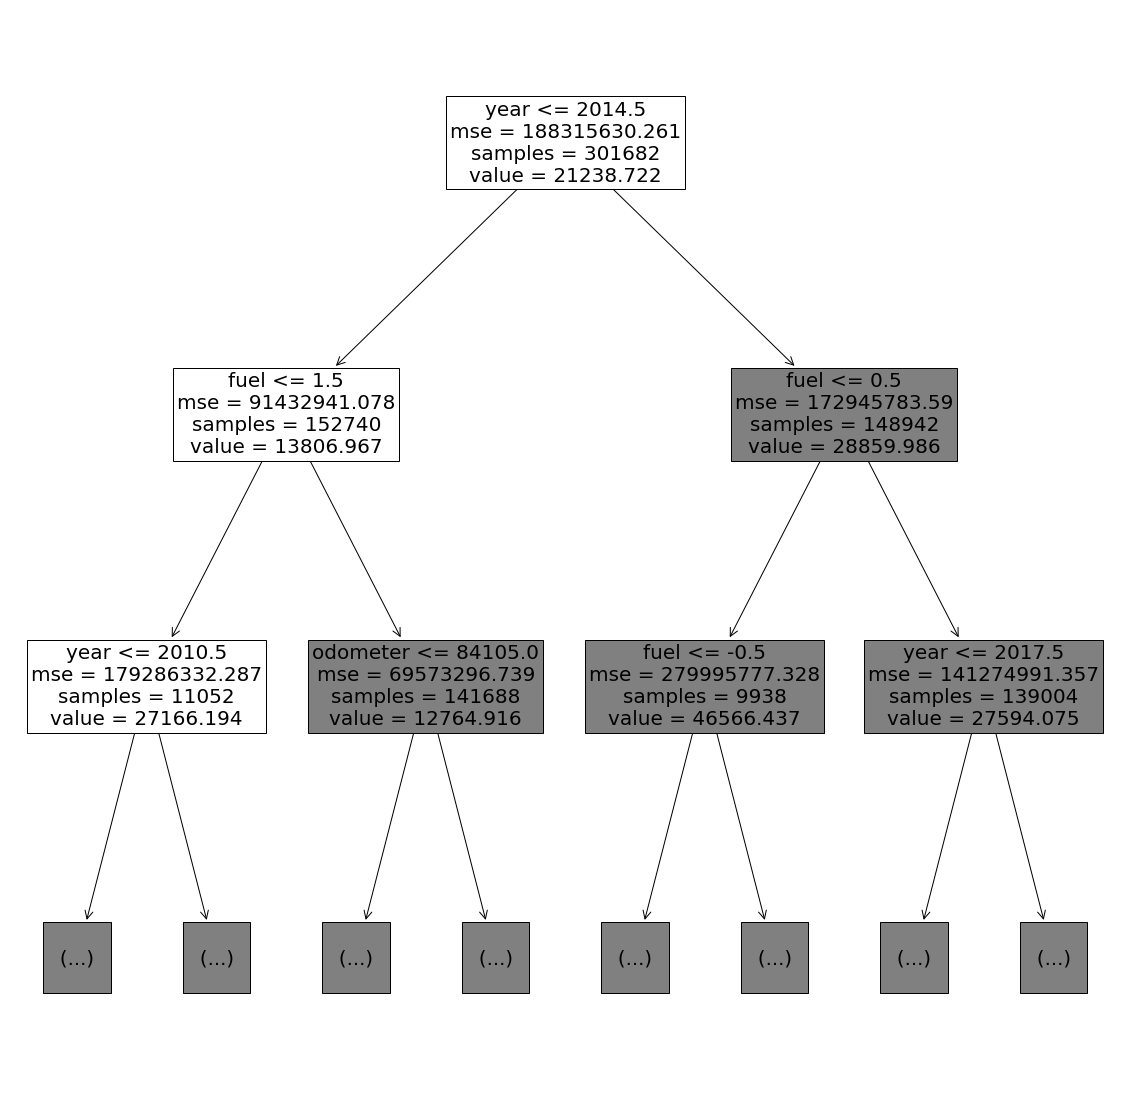

In [25]:
# a decision tree model is used. To adjust the hyperparamters, we can use a randomisedsearchcv class. I tested and 
# the hyperparameters were not much different than these.
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree 
from sklearn.metrics import mean_squared_error
tr = DecisionTreeRegressor(max_depth = 100, min_samples_split = 10, random_state = 0)
tr.fit(x_train, y_train)
print('The R2 measure using decision tree is', tr.score(x_test, y_test))
print('The MSE measure using decision tree is', (mean_squared_error(tr.predict(x_test), y_test)) ** .5)
# lets plot the tree and see which feature will be used first , the depth of more than 2 can be seen on the screen.
plt.figure(figsize=(20, 20))
plot_tree(tr, max_depth=2, fontsize=20, feature_names=list(x_train.columns))
plt.show()

In [26]:
# then a randomforest model is used. and the results are printed.
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=30, n_estimators=120, min_samples_split=10, random_state=0)
rfr.fit(x_train, y_train)
print('The R2 measure using random_forest is', rfr.score(x_test, y_test))
print('The root of MSE using random_forest is', (mean_squared_error(rfr.predict(x_test), y_test)) ** .5)

The R2 measure using random_forest is 0.9362260780033534
The root of MSE using random_forest is 3494.661008967373


In [27]:
# here the data is split(train, validation) and scaled to be fed to a ANN model.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

x_train, x_val = train_test_split(x_train, test_size = .1, random_state = 1)
y_val = y_train[x_val.index]
y_train = y_train[x_train.index]

# 10 percents of the samples are used for testing the model.

scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train) # the training dataset is scaled and the
# validation set  and testset are scaled accordingly.
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


# of the remaining,20 percent for validation.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))# using tensorflow dataset library, datsets
# are built.
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print(train_ds.cardinality().numpy())
# datsets are put in mini batches. for this particular dataset this size were found more useful as i wanted to 
# get a good enough results with a low amount of training time.
train_ds = train_ds.batch(batch_size=256).cache(
).shuffle(buffer_size = len(train_ds), seed = 0).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(batch_size = 256)

print(train_ds.cardinality().numpy())
train_ds.element_spec

271513
1061


(TensorSpec(shape=(None, 23), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [28]:
# i used three hidden layers and one dropout. the metric i used is MSE
my_model = tf.keras.Sequential()
my_model.add(tf.keras.Input(shape = (23,)))
my_model.add(tf.keras.layers.Dense(512, activation = 'relu'))
my_model.add(tf.keras.layers.Dense(64, activation = "relu"))
my_model.add(tf.keras.layers.Dropout(.5))
my_model.add(tf.keras.layers.Dense(1))



loss_funstion =  tf.keras.losses.MeanSquaredError()
my_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
my_model.compile(optimizer = my_optimizer, loss = loss_funstion, metrics = ["MeanSquaredError"])
# accuracy is used as the metric.
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               12288     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 45,185
Trainable params: 45,185
Non-trainable params: 0
_________________________________________________________________


In [29]:
train_history = my_model.fit(train_ds, epochs = 120, validation_data = val_ds)

Epoch 1/120
1061/1061 [==============================] - 7s 7ms/step - loss: 276805568.0000 - mean_squared_error: 276805568.0000 - val_loss: 161085456.0000 - val_mean_squared_error: 161085456.0000
Epoch 2/120
1061/1061 [==============================] - 5s 5ms/step - loss: 149505760.0000 - mean_squared_error: 149505760.0000 - val_loss: 110461936.0000 - val_mean_squared_error: 110461936.0000
Epoch 3/120
1061/1061 [==============================] - 6s 5ms/step - loss: 120342088.0000 - mean_squared_error: 120342088.0000 - val_loss: 98257160.0000 - val_mean_squared_error: 98257160.0000
Epoch 4/120
1061/1061 [==============================] - 5s 5ms/step - loss: 115110248.0000 - mean_squared_error: 115110248.0000 - val_loss: 94641176.0000 - val_mean_squared_error: 94641176.0000
Epoch 5/120
1061/1061 [==============================] - 6s 6ms/step - loss: 112951424.0000 - mean_squared_error: 112951424.0000 - val_loss: 92104512.0000 - val_mean_squared_error: 92104512.0000
Epoch 6/120
1061/1061

In [30]:
print('The root of MSE measure using decision tree is', (
    mean_squared_error(my_model.predict(x_test), y_test)) ** .5)

The root of MSE measure using decision tree is 6720.98452994511


Text(0.5, 0, 'posted prices')

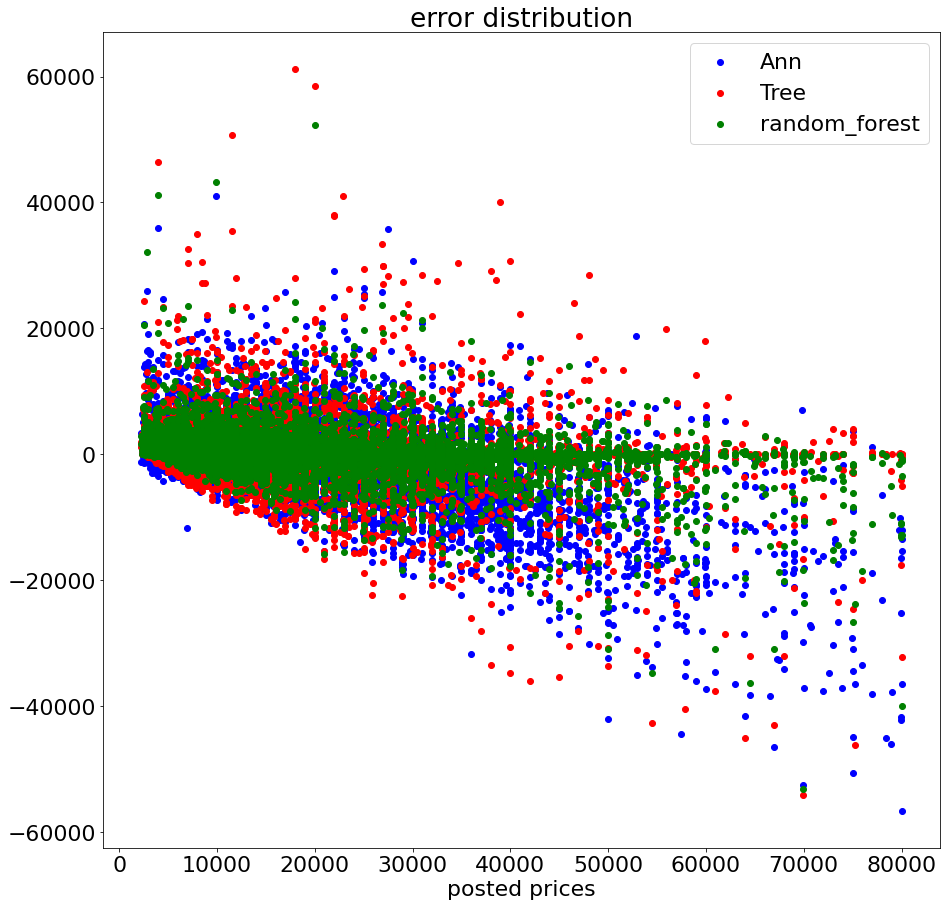

In [31]:
# finally, here i plot the error distribution as a function of price tag.
ann_err  = np.reshape(my_model.predict(x_test), -1) - y_test.values
tree_err = np.reshape(tr.predict(test_set), -1) - y_test.values
forest_err=np.reshape(rfr.predict(test_set),-1)-y_test.values
plt.figure(figsize = (15, 15))
colors = ['b', 'r', 'g']
errors = [ann_err, tree_err,forest_err]
labels = ['Ann', 'Tree', 'random_forest']
for i, v in enumerate(errors):
    plt.scatter(y_test.values, v, facecolor=colors[i], label=labels[i])
plt.legend()
plt.title("error distribution")
plt.xlabel('posted prices')
#plt.grid()

They show that the error is higher when the prices of the cars are higher, as ecpected.